/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 60.3MB/s]


Please upload an image for detection:


Saving R.jpeg to R.jpeg


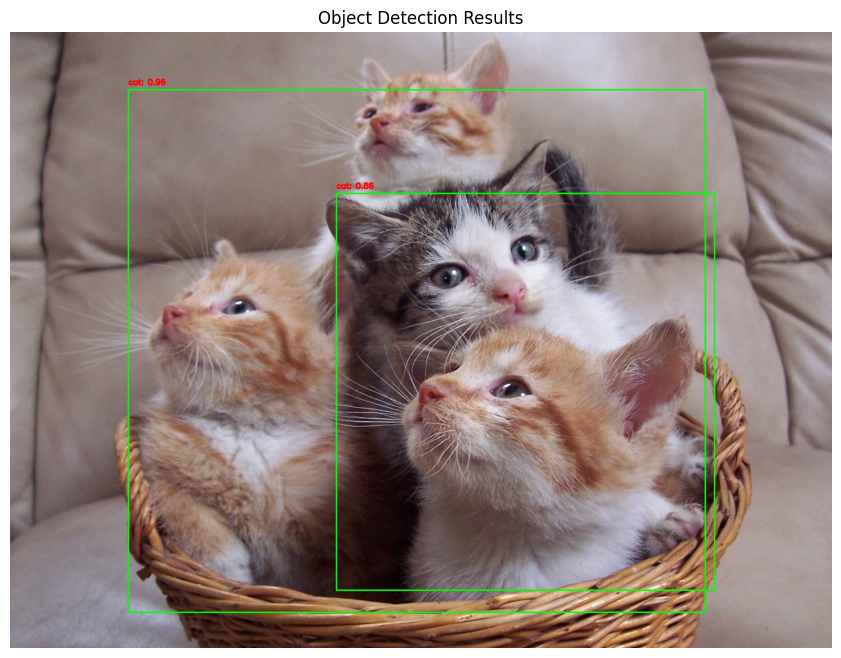

In [1]:
# Install necessary libraries (uncomment if running for the first time)
# !pip install torch torchvision

# Import required libraries
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import cv2
import numpy as np
from google.colab import files

# Define COCO class labels
COCO_CLASSES = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus",
    "train", "truck", "boat", "traffic light", "fire hydrant", "N/A", "stop sign",
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant",
    "bear", "zebra", "giraffe", "N/A", "backpack", "umbrella", "N/A", "N/A", "handbag",
    "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "N/A", "wine glass",
    "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
    "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "N/A",
    "dining table", "N/A", "N/A", "toilet", "N/A", "TV", "laptop", "mouse", "remote", "keyboard",
    "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "N/A", "book", "clock",
    "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Load the Faster R-CNN model pretrained on COCO dataset
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Prompt user to upload an image
print("Please upload an image for detection:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded image path

# Open the uploaded image
image = Image.open(image_path).convert("RGB")

# Preprocess the image: Convert to tensor as required by the model
transform = T.Compose([
    T.ToTensor()  # Converts PIL image to PyTorch tensor
])
image_tensor = transform(image)

# Perform object detection
with torch.no_grad():  # Disable gradient calculations for faster processing
    predictions = model([image_tensor])  # Model inference

# Extract predictions
boxes = predictions[0]['boxes']  # Bounding boxes for detected objects
labels = predictions[0]['labels']  # Class labels for detected objects
scores = predictions[0]['scores']  # Confidence scores for detected objects

# Convert the image to a NumPy array for visualization
image_np = np.array(image)

# Set a confidence threshold for displaying detections
confidence_threshold = 0.5

# Draw bounding boxes and class labels on the image
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:  # Filter results based on confidence score
        x1, y1, x2, y2 = map(int, box)  # Extract coordinates of the bounding box
        label_index = labels[i].item()  # Extract the label index
        label_name = COCO_CLASSES[label_index]  # Get the label name from COCO classes
        score = scores[i].item()  # Extract the confidence score

        # Draw a rectangle around the detected object
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add a label with the class name and confidence score
        text = f"{label_name}: {score:.2f}"
        cv2.putText(image_np, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the resulting image with detections
plt.figure(figsize=(12, 8))
plt.imshow(image_np)
plt.axis("off")
plt.title("Object Detection Results")
plt.show()
